#Basic Document Classification
*   Pre-processing
*   Latent Dirichlet Allocation (LDA)
*   Sentiment Analysis

Must install the following library:
*   PyThaiNLP
    *  https://www.thainlp.org/pythainlp/tutorials/index.html
    *  https://thainlp.org/pythainlp/docs/2.2/index.html
*   polyglot
    *  https://polyglot.readthedocs.io/en/latest/index.html

In [ ]:
# !pip install pythainlp

#----- dependency of polyglot -----v
# !pip install PyICU
# !pip install pycld2
# !pip install morfessor
#----- dependency of polyglot -----^
# !pip install polyglot
# !polyglot download sentiment2.th #-- load thai language


#Pre-processing
*   Separate individual instances
*   Choose parts of instances

Link to data: https://drive.google.com/file/d/1I1cJ7C9_OwJIWkRJsVTBoYj0zE6WulP9/view?usp=sharing

In [ ]:
import re
import pythainlp

maxInstance = 3000

with open('/content/drive/My Drive/Colab Notebooks/example_data.csv', 'r', encoding='utf8') as f:
    count = 0
    colnum = 0
    cColCount = 0
    tmpText = ''
    data = []

    for line in f:
        content = re.sub(r'\s+','',line.strip())
        colCount = len(content.split(','))

        if count == 0:
            colnum = colCount
            # print(content)
        else:
            checkNewInstance = re.search('display-post-story', content)
            if not checkNewInstance:
                tmpText += content
                cColCount += colCount
            else:
                if len(tmpText) != 0:
                    data.append(tmpText)
                    # print('%d (%d) -> %s' % (len(data), cColCount, tmpText[:50]))
                tmpText = content
                cColCount = colCount

        count += 1
        if len(data) >= maxInstance:
            break

# Word Cloud

In [ ]:
topicType = []
ldaData = []
sentimentData = []
stopword = pythainlp.corpus.thai_stopwords()
for d in data:
    contents = d.split(',')
    #-- topic_title,content,content_raw,topic_tags,topic_type,topic_datetime,user_id,username,topic_url --
    #-- topic_type: ['กระทู้คำถาม', 'กระทู้สนทนา', 'กระทู้รีวิว', 'กระทู้ข่าว', 'กระทู้โพล'] --
    # print(contents[:2]+contents[-6:-2])

    #== for generating word cloud using 'topic_title' with the specific topic types ==
    typeFilter = ['กระทู้คำถาม']
    tType = contents[-5]
    if tType in typeFilter:
      terms = pythainlp.tokenize.word_tokenize(' '.join(contents[:1]))
      filteredTerms = [t for t in terms if len(t)>2 and not t in stopword ] # remove terms with less than 2 characters
      topicType.append(' '.join(filteredTerms))

    #== for LDA using 'topic_title' and 'content' ==
    terms = pythainlp.tokenize.word_tokenize(' '.join(contents[:2]))
    filteredTerms = [t for t in terms if len(t)>2 ] # remove terms with less than 2 characters
    ldaData.append('|'.join(filteredTerms))

    #== for Sentiment Analysis using 'topic_title' ==
    terms = pythainlp.tokenize.word_tokenize(' '.join(contents[:1]))
    filteredTerms = [t for t in terms if len(t)>2 ] # remove terms with less than 2 characters
    sentimentData.append(''.join(filteredTerms))

Create 'Word Cloud' from topics with the specific types

#instance: 1294


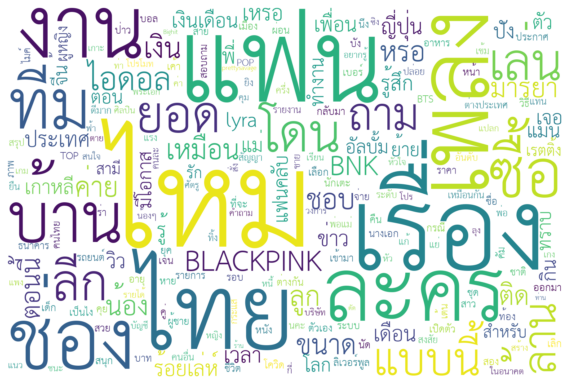

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from pythainlp import tokenize

regexp = r"[ก-๙a-zA-Z']+"
text = ' '.join(topicType)
tx = tokenize.word_tokenize(text)
print('#instance: %d'%len(topicType))

path = '/content/drive/My Drive/Colab Notebooks/THSarabunNew.ttf'
# mask = np.array(Image.open("/content/mask.png"))

wordcloud = WordCloud(
                      font_path=path,
                      relative_scaling = 0.3,
                      min_font_size=1,
                      background_color="white",
                      width=600,
                      height=400,
                      max_words=200,
                      # mask=mask,
                      # colormap='plasma',
                      scale=3,
                      font_step=4,
                      # contour_width=3,
                      # contour_color='steelblue',
                      collocations=False,
                      regexp=regexp,
                      margin=2
                      ).generate(text)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

#Latent Dirichlet Allocation (LDA)

Source: https://colab.research.google.com/drive/1NWj4ioKmqtC1xQkC6opATdGZc27Z9miL#scrollTo=MFYJEdGaNG53

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups
import numpy as np

In [ ]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [ ]:
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20

In [ ]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                # token_pattern="(?u)\\|(\\w{3,})\\|",
                                token_pattern="(?u)\\|(\\w+)\\|",
                                max_features=n_features,
                                lowercase=False)

tf = tf_vectorizer.fit_transform(ldaData)
feature_name = tf_vectorizer.get_feature_names()
print(feature_name)
index_dict = dict(enumerate(feature_name))
# print(index_dict)
# print(tf.toarray()[0])

['000', '001', '100', '1000', '120', '130', '150', '160', '199', '200', '2007', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2563', '300', '3000', '350', '365', '400', '500', '5000', '555', '5555', '55555', '555555', '600', 'AFO', 'BLACKPINK', 'BLACKPINKLIGHTUPTHESKY', 'BLACKPINKYOUTUBEBLACKPINK', 'BNK', 'BOOMBAYAHRoadto', 'BTS', 'Billboard', 'BillboardGlobal', 'BillboardHOT', 'BillboardHot', 'BlackPink', 'Blackpink', 'Bugs', 'CGM', 'CLPjZF', 'CanYou', 'CardiB', 'Center', 'Civic', 'Credit', 'DeliciousRendezvous', 'DigitalLiveStudio', 'Dynamite', 'ENHYPEN', 'EPEpisode', 'EVERGLOW', 'EXO', 'Episode', 'Excl', 'FLO', 'FRR', 'Facebook', 'Genie', 'GloryGloryManUnited', 'HANTEOCHART', 'HKvKYPkri', 'HowYouLikeThat', 'HowYouLikeThatRoadto', 'IAM', 'ICECREAMRoadto', 'IceCream', 'JYPETWICE', 'JisooBLACKPINK', 'Jungkook', 'KST', 'KXl', 'LISALILIFILM', 'LOONA', 'LOVESICKGIRLS', 'LYRA', 'Lakers', 'Live', 'LovesickGirls', 'LovesickGirlsRoadto', 'Lyra', 'MVIEWS', 'MelOn', 'MozSoPIsD', 'NBA

In [ ]:
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Topic #0: การ จอง BTS BNK 2563 และ ประกาศ ระบบ รอบ ของ สามารถ bnk จาก เลข ราย CGM จำนวน การแสดง แอพ เวลา
Topic #1: ราคา ทาน บาท เลย อาหาร ทอด ขาว แบบ ปลา เอา จาน สอง ซอย ลอง และ กรอบ หอม ประมาณ หวาน แพง
Topic #2: ไหม เลย สวย เนย มาก ตาม ทำไม ไอดอล ขนาด ประเทศ เชฟ แบบ ชอบ ภาพ ใคร ตอน หลาย คอนโด แฟน ของ
Topic #3: https com www BLACKPINK twitter จาก คะแนน topic pantip THEALBUM สาว รายการ http Episode DeliciousRendezvous ไทย อะไร ทาง Top ทางการ
Topic #4: เพลง ดาว 2020 เจน LYRA ยอด เอม โหวต Dynamite รายงาน ของ ราว NCT จาก 600 lyra Genie FLO โปรเจค แบน
Topic #5: ของ และ เลย มาก การ จาก เพราะ อะไร อยาก แบบ เรา งาน ใคร ไหน เคย ชอบ หลาย ตาม เอง เยอะ
Topic #6: ยอด นางเอก โดน โลก โคจร นาย ภาพ สาขา เดอะ 300 ศาล ทนาย ตาย เลน เสา กอง อฟช ทราบ ดวงชะตา ใคร
Topic #7: ละคร ของ และ จาก ไทย แรก โดย Spoil ทาง มารยา 2020 ประเทศ มาก ชาว ยอดขาย รถไฟ ภาค https เกาะ ฉาก
Topic #8: เรา เขา อะไร เพราะ อยาก เลย แฟน ทำงาน ใคร และ งาน เคย ถาม เวลา เจอ เอา ไหม บอก สามารถ https
Topic #9: เธอ ของ สามารถ โดย แฟน ลอง เกม 

#Sentiment Analysis

Use 'polyglot' library since 'PyThaiNLP' has no longer supported sentiment lexicon.

In [ ]:
from polyglot.text import Text

for x in sentimentData:
  text = Text(x)
  polVector = [w.polarity for w in text.words]
  print(x, polVector)
  print(sum(polVector))

  # break

Detector is not able to detect the language reliably.


...กับรอบชิงที่ไม่เชฟผู้ช่วย [0, 0, 0, -1, 1, 0, 0, 0, 0, 0, 1]
1
ทำไมบิดาแห่งฟิสิกส์นิวเคลียร์ถึงได้รางวัลโนเบลสาขาเคมีครับ [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]
2
พึ่งสังเกตว่าที่กว่าเงินซื้อความสุขไม่ได้ส่วนใหญ่หน้าที่การงานรวยทั้งนั้น [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, -1, 0, 0, 1, 0, 0, 0]
2
ที่อยู่ประเทศแคนาดาและสหรัฐอเมริกาแถบตะวันออกของเหล่าอาณาจักรทำไมถึงได้โชคดีขนาดนี้ครับ [0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0]
1


ValueError: ignored